In [1]:
# Imports
import yfinance as yf
import pandas as pd
import os

In [4]:
# --- Configuration ---
tickers_list = ["AAPL", "MSFT", "GOOGL", "^GSPC"]
start_date = "2014-01-01"
end_date = "2024-12-31"
fin_data_filename = "financial_data.csv"

In [6]:
# --- Download Data ---
# Run this block for donwnloading data to financial_data.csv if there is no such file yet in the project folder
"""
print(f"Downloading data for: {', '.join(tickers_list)}")
print(f"Period: {start_date} to {end_date}")

try:
    all_data = yf.download(tickers_list, start=start_date, end=end_date)

    if not all_data.empty:
        print("\nData downloaded successfully.")

        # Посмотрим на структуру столбцов, чтобы понять, что мы сохраняем
        print("\nStructure of downloaded data columns:")
        print(all_data.columns)

        # --- Save Data to CSV ---
        try:
            all_data.to_csv(fin_data_filename)
            print(f"\nAll downloaded data (including OHLCV) successfully saved to: {fin_data_filename}")
        except Exception as e:
            print(f"\nError saving data to {fin_data_filename}: {e}")
            print("Data was downloaded but not saved.")

    else:
        print("\nDownloaded data (all_data) is empty. Please check tickers and date range. Data not saved.")

except Exception as e:
    print(f"\nAn error occurred during download: {e}")
    print("Data not saved.")
"""

'\nprint(f"Downloading data for: {\', \'.join(tickers_list)}")\nprint(f"Period: {start_date} to {end_date}")\n\ntry:\n    all_data = yf.download(tickers_list, start=start_date, end=end_date)\n\n    if not all_data.empty:\n        print("\nData downloaded successfully.")\n\n        # Посмотрим на структуру столбцов, чтобы понять, что мы сохраняем\n        print("\nStructure of downloaded data columns:")\n        print(all_data.columns)\n\n        # --- Save Data to CSV ---\n        try:\n            all_data.to_csv(fin_data_filename)\n            print(f"\nAll downloaded data (including OHLCV) successfully saved to: {fin_data_filename}")\n        except Exception as e:\n            print(f"\nError saving data to {fin_data_filename}: {e}")\n            print("Data was downloaded but not saved.")\n\n    else:\n        print("\nDownloaded data (all_data) is empty. Please check tickers and date range. Data not saved.")\n\nexcept Exception as e:\n    print(f"\nAn error occurred during downlo

In [10]:
# --- Load Data from CSV ---
if os.path.exists(fin_data_filename):
    print(f"Loading data from {fin_data_filename}...")
    try:
        all_data = pd.read_csv(fin_data_filename, header=[0, 1], index_col=0, parse_dates=True)
        print("Data loaded successfully.")
        print("\nData head:")
        print(all_data.head())
        print("\nData columns:")
        print(all_data.columns)
    except Exception as e:
        print(f"Error loading data from {fin_data_filename}: {e}")
        all_data = pd.DataFrame() # Initialize empty dataframe if loading fails
else:
    print(f"File {fin_data_filename} not found. Please run the download block first.")
    all_data = pd.DataFrame() # Initialize empty dataframe# --- Basic Data Inspection (if data loaded) ---
if not all_data.empty:
    print("\n--- Data Inspection ---")
    all_data.info()

Loading data from financial_data.csv...
Data loaded successfully.

Data head:
Price           Close                                          High  \
Ticker           AAPL      GOOGL       MSFT        ^GSPC       AAPL   
Date                                                                  
2014-01-02  17.192829  27.723312  30.939615  1831.979980  17.314052   
2014-01-03  16.815168  27.521074  30.731455  1831.369995  17.210541   
2014-01-06  16.906870  27.827919  30.082041  1826.770020  16.996077   
2014-01-07  16.785944  28.364391  30.315155  1837.880005  16.969953   
2014-01-08  16.892250  28.423416  29.773956  1837.489990  16.957523   

Price                                                Low             \
Ticker          GOOGL       MSFT        ^GSPC       AAPL      GOOGL   
Date                                                                  
2014-01-02  27.838627  31.139442  1845.859985  17.158328  27.602269   
2014-01-03  27.818201  30.989564  1838.239990  16.798072  27.519332  

In [14]:
    # Выберем только 'Close' для анализа доходностей, например
    close_data = all_data['Close'].copy()
    print("\nClose prices head:")
    print(close_data.head())


Close prices head:
Ticker           AAPL      GOOGL       MSFT        ^GSPC
Date                                                    
2014-01-02  17.192829  27.723312  30.939615  1831.979980
2014-01-03  16.815168  27.521074  30.731455  1831.369995
2014-01-06  16.906870  27.827919  30.082041  1826.770020
2014-01-07  16.785944  28.364391  30.315155  1837.880005
2014-01-08  16.892250  28.423416  29.773956  1837.489990


In [17]:
if not close_data.empty:
    print("\n--- Calculating Daily Returns ---")
    # Используем простые процентные изменения для начала
    daily_returns = close_data.pct_change()
    # Первое значение будет NaN, можно его удалить или заполнить 0
    daily_returns = daily_returns.dropna() # или daily_returns.fillna(0, inplace=True)
    print("\nDaily Returns head:")
    print(daily_returns.head())
else:
    print("Close data is empty!")


--- Calculating Daily Returns ---

Daily Returns head:
Ticker          AAPL     GOOGL      MSFT     ^GSPC
Date                                              
2014-01-03 -0.021966 -0.007295 -0.006728 -0.000333
2014-01-06  0.005453  0.011149 -0.021132 -0.002512
2014-01-07 -0.007152  0.019278  0.007749  0.006082
2014-01-08  0.006333  0.002081 -0.017852 -0.000212
2014-01-09 -0.012770 -0.009630 -0.006431  0.000348



--- Plotting Close Prices ---


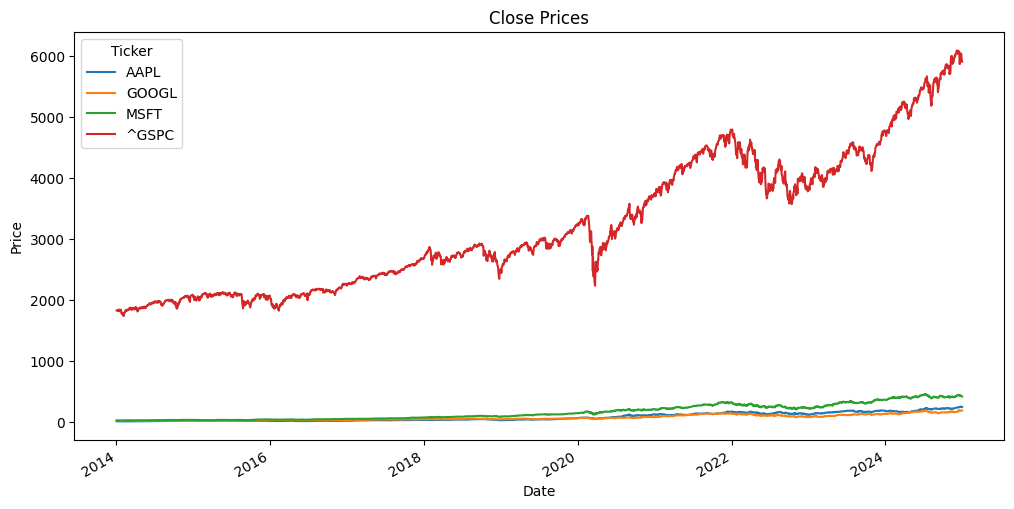


--- Plotting Daily Returns ---


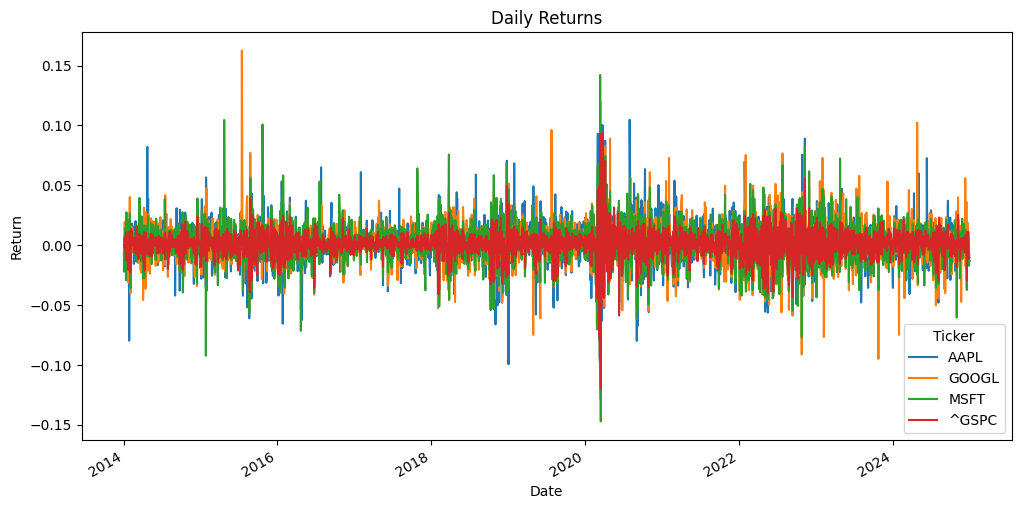


--- Plotting Histograms of Daily Returns ---


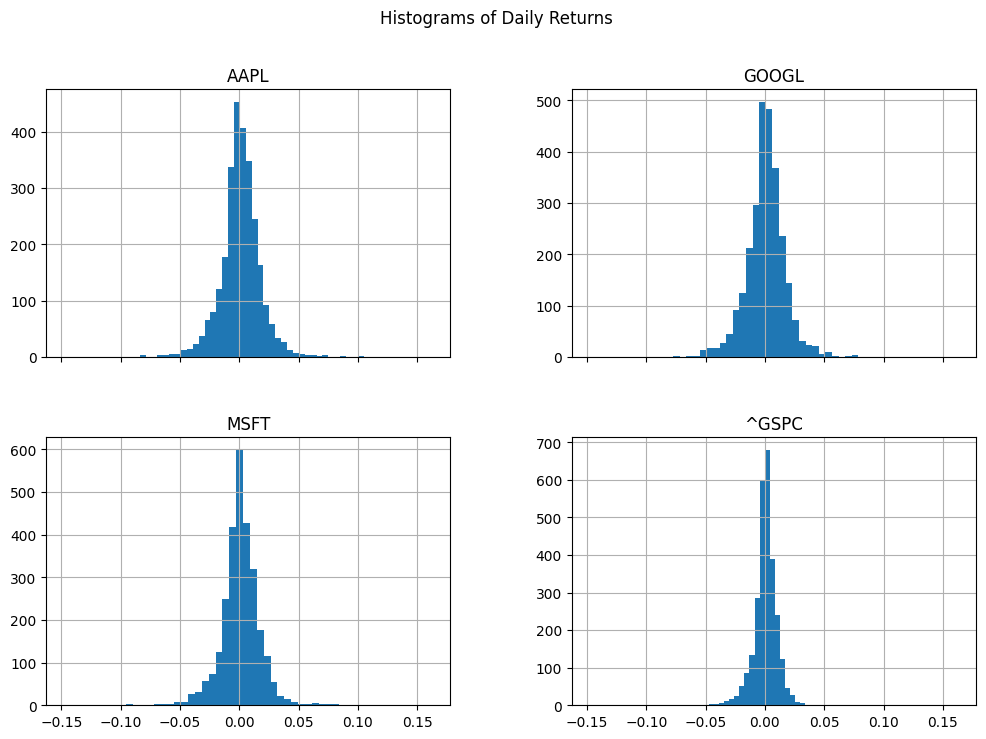

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

if not close_data.empty:
    print("\n--- Plotting Close Prices ---")
    close_data.plot(figsize=(12, 6), title="Close Prices")
    plt.ylabel("Price")
    plt.show()

if 'daily_returns' in locals() and not daily_returns.empty: # Проверяем, существует ли daily_returns
    print("\n--- Plotting Daily Returns ---")
    daily_returns.plot(figsize=(12, 6), title="Daily Returns", subplots=False) # subplots=True для отдельных графиков
    plt.ylabel("Return")
    plt.show()

    print("\n--- Plotting Histograms of Daily Returns ---")
    daily_returns.hist(bins=50, figsize=(12, 8), sharex=True)
    plt.suptitle("Histograms of Daily Returns")
    plt.show()